In [1]:
##https://blog.csdn.net/pipisorry/article/details/41957763

# 用途

In [8]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [9]:
docs = []
i = 0
with open(r'../result/操作系统.txt', 'r', encoding='utf-8') as fp:
    docs_list = fp.readlines()
    
for item in docs_list:
    docs.append(item)
    i += 1
    if i >= 20:
        break
docs

['课程太过简短了，当然你也可以说学生应该学会课后自学，但如果大部分都要自学的话就不用这个课程，而且那个男的老师，说话口齿不太清楚，不仅口吃不清，完全就是念ppt，居然还是国家精品？\n',
 '真心很推荐初学者选择这个课程，经常结合各种例子通俗易懂，而且总结也很到位，不像别的上来就一堆枯燥术语轮番轰炸。。\n',
 '我觉得这个课程完全可以作为国家精品课程。同时看过其他几个学校的操作系统课程，感觉这个讲的最具体清晰，课程结构合理。\n',
 '很好，老师的普通话很标准。\n',
 '学校里的操作系统上课我一节没有听，就听了这些课，都全靠各位老师教授相救，期末考了90，感谢各位老师教授。\n',
 '苏大的这个操作系统是真正的拿出诚意来了！第一次看到，还要上课实录的时候，非常惊喜，感觉就像在教室里一样，李培峰教授也讲的非常清楚，跟着课程走就不会有什么问题，推荐！\n',
 '内容很全面，老师讲解也挺到位。可以适当增加实验课程，毕竟操作系统还是需要实验的。还有给老师们一个建议：就是讲课时可以稍微放松些，感觉有些太严肃了。\n',
 '能把那个blingbling的声音去掉吗 秋梨膏\n',
 '课程讲解详细，内容充实，受益匪浅。\n',
 'ok111\n',
 '哇！超出预期了\n',
 '学习起来非常方便，讲解也非常详细\n',
 '结构清晰，讲解详细\n',
 '结合各种例子通俗易懂，讲解详细，内容充实。推荐！\n',
 '很好，收获很大\n',
 '好，特别棒，太棒了\n',
 '老师讲课很好 题目针对性也很强\n',
 '讲的太好了\n',
 '好好好好好好\n',
 '非常棒，简单明了，内容也很充实。\n']

In [10]:
vectorizer = TfidfVectorizer()
tf_idf = vectorizer.fit_transform(docs)
print("idf: ", [(n, idf) for idf, n in zip(vectorizer.idf_, vectorizer.get_feature_names_out())])
print("\n")
print("v2i: ", vectorizer.vocabulary_)

idf:  [('ok111', 3.3513752571634776), ('不仅口吃不清', 3.3513752571634776), ('不像别的上来就一堆枯燥术语轮番轰炸', 3.3513752571634776), ('但如果大部分都要自学的话就不用这个课程', 3.3513752571634776), ('内容也很充实', 3.3513752571634776), ('内容充实', 2.9459101490553135), ('内容很全面', 3.3513752571634776), ('受益匪浅', 3.3513752571634776), ('可以适当增加实验课程', 3.3513752571634776), ('同时看过其他几个学校的操作系统课程', 3.3513752571634776), ('太棒了', 3.3513752571634776), ('好好好好好好', 3.3513752571634776), ('学习起来非常方便', 3.3513752571634776), ('学校里的操作系统上课我一节没有听', 3.3513752571634776), ('完全就是念ppt', 3.3513752571634776), ('就听了这些课', 3.3513752571634776), ('就是讲课时可以稍微放松些', 3.3513752571634776), ('居然还是国家精品', 3.3513752571634776), ('当然你也可以说学生应该学会课后自学', 3.3513752571634776), ('很好', 2.9459101490553135), ('感觉就像在教室里一样', 3.3513752571634776), ('感觉有些太严肃了', 3.3513752571634776), ('感觉这个讲的最具体清晰', 3.3513752571634776), ('感谢各位老师教授', 3.3513752571634776), ('我觉得这个课程完全可以作为国家精品课程', 3.3513752571634776), ('推荐', 2.9459101490553135), ('收获很大', 3.3513752571634776), ('期末考了90', 3.3513752571634776), ('李培峰教授也讲的非常清楚', 3

## 文档相似性

In [11]:
q = "一会有声音 一会没声音"
qtf_idf = vectorizer.transform([q])
res = cosine_similarity(tf_idf, qtf_idf)
res = res.ravel().argsort()[-3:]  #排序
print("\ntop 3 docs for '{}':\n{}".format(q, [docs[i] for i in res[::-1]]))


top 3 docs for '一会有声音 一会没声音':
['非常棒，简单明了，内容也很充实。\n', '好好好好好好\n', '真心很推荐初学者选择这个课程，经常结合各种例子通俗易懂，而且总结也很到位，不像别的上来就一堆枯燥术语轮番轰炸。。\n']


## 文章-词语

In [12]:
def show_tfidf(tfidf, vocab, filename):
    # [n_doc, n_vocab]
    ## 以下两行代码来自于：http://c.biancheng.net/matplotlib/9284.html
    plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
    plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
    
    plt.imshow(tfidf, cmap="YlGn", vmin=tfidf.min(), vmax=tfidf.max()) #热图
    plt.xticks(np.arange(tfidf.shape[1]), vocab, fontsize=6, rotation=90)
    plt.yticks(np.arange(tfidf.shape[0]), np.arange(1, tfidf.shape[0]+1), fontsize=6)
    plt.tight_layout()
    plt.savefig("%s.png" % filename, format="png", dpi=500)
    plt.show()

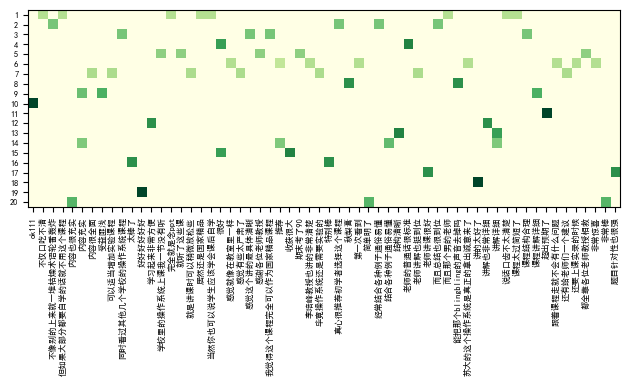

In [13]:
import matplotlib.pyplot as plt
import numpy as np

i2v = {i: v for v, i in vectorizer.vocabulary_.items()}
dense_tfidf = tf_idf.todense()  #转换为矩阵
show_tfidf(dense_tfidf, [i2v[i] for i in range(dense_tfidf.shape[1])], "tfidf_sklearn_matrix")

In [14]:
import os
path = os.getcwd()
print("图片保存这里:",path)

图片保存这里: D:\JupyterProject\GraduateProject\project


## 抽取关键词语

参考资料：https://github.com/fxsjy/jieba

jieba.analyse.extract_tags(sentence, topK=20, withWeight=False, allowPOS=()) <br>
sentence 为待提取的文本 <br>
topK 为返回几个 TF/IDF 权重最大的关键词，默认值为 20 <br>
withWeight 为是否一并返回关键词权重值，默认值为 False <br>
allowPOS 仅包括指定词性的词，默认值为空，即不筛选 <br>

In [15]:
from jieba import analyse
text = "英语四六级是每名大学生都要经历的一项考试，每当考试结束之后，英语四六级考试都会出现不少“神翻译”。甚至有些老师调侃说：本身大量判卷是很辛苦的事情，但是这些“惊喜”真的是“苦中作乐”。"
tags = analyse.extract_tags(text, topK=20, withWeight=False, allowPOS=())

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\20866\AppData\Local\Temp\jieba.cache
Loading model cost 0.589 seconds.
Prefix dict has been built successfully.


In [16]:
print(tags)

['四六级', '考试', '英语', '判卷', '苦中作乐', '每名', '调侃', '惊喜', '每当', '辛苦', '大学生', '翻译', '一项', '老师', '经历', '本身', '真的', '结束', '不少', '大量']


# 归一化问题

## 不归一

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# # 实例化tf实例
# tv = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None)
# # 输入训练集矩阵，每行表示一个文本
# train = ["Chinese Beijing Chinese",
#           "Chinese Chinese Shanghai",
#           "Chinese Macao",
#           "Tokyo Japan Chinese"]

# # 训练，构建词汇表以及词项idf值，并将输入文本列表转成VSM矩阵形式
# tv_fit = tv.fit_transform(train)
# # 查看一下构建的词汇表
# print(tv.get_feature_names())

# tv_fit.toarray().tolist()

In [ ]:
# tf = n
# idf = lg((D+1)/(d+1))+1
# tf*idf

In [ ]:
1.916290731874155/(1.916290731874155+2)

## 归一化_方法1 

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tv = TfidfVectorizer(use_idf=True, smooth_idf=True,norm = 'l1')
# # 输入训练集矩阵，每行表示一个文本
# train = ["Chinese Beijing Chinese",
#           "Chinese Chinese Shanghai",
#           "Chinese Macao",
#           "Tokyo Japan Chinese"]

# # 训练，构建词汇表以及词项idf值，并将输入文本列表转成VSM矩阵形式
# tv_fit = tv.fit_transform(train)
# # 查看一下构建的词汇表
# print(tv.get_feature_names())

# # 查看输入文本列表的VSM矩阵
# tv_fit.toarray().tolist()

## 归一化_方法2_默认的归一化方法

In [ ]:
# tv = TfidfVectorizer(use_idf=True, smooth_idf=True,norm = 'l2')#
# # 输入训练集矩阵，每行表示一个文本
# train = ["Chinese Beijing Chinese",
#           "Chinese Chinese Shanghai",
#           "Chinese Macao",
#           "Tokyo Japan Chinese"]

# # 训练，构建词汇表以及词项idf值，并将输入文本列表转成VSM矩阵形式
# tv_fit = tv.fit_transform(train)
# # 查看一下构建的词汇表
# print(tv.get_feature_names())

# # 查看输入文本列表的VSM矩阵
# tv_fit.toarray().tolist()

In [ ]:
0.6918346120039814*0.6918346120039814+0.7220560017292982*0.7220560017292982

## 传统归一化 

In [ ]:
# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.preprocessing import Normalizer
# vectorizer = CountVectorizer()  # 实例化
# transformer = TfidfTransformer(norm = None)
# #corpus = ["我 来到 中国 旅游", "中国 欢迎 你","我 喜欢 来到 中国 天安门"]
# corpus = ["Chinese Beijing Chinese",
#           "Chinese Chinese Shanghai",
#           "Chinese Macao",
#           "Tokyo Japan Chinese"]

In [ ]:
# norm1 = Normalizer(norm='l1')
# a = vectorizer.fit_transform(corpus)
# print(vectorizer.get_feature_names())
# print(a.toarray().tolist())

In [ ]:
# a = norm1.fit_transform(a)
# print(a.toarray().tolist())

In [ ]:
# result_list2 = transformer.fit_transform(a).toarray().tolist()
# word = vectorizer.get_feature_names()
# #print(transformer.get_params())
# print('词典为：')
# print(word)
# print('归一化后的tf-idf值为：')
# for weight in result_list2:
#     print(weight)

In [ ]:
# tf = n/N
# idf = 
# tf*idf